# Is Fandango Still Inflating Ratings?

Fandango is an online movie ratings aggregator that was accused of being biased and dishonest by inflating their ratings. For example, movies that were 4.1 starts, would be rounded to 4.5 starts, instead of 4 stars, as you may expect. Fandango replied by saying that biased rounding errors were caused by a bug in their system.


In this project, we'll analyze more recent movie ratings to determine whether there has been any change in Fandango's rating system.

In [2]:
import pandas as pd

old_data = pd.read_csv("fandango_score_comparison.csv")
new_data = pd.read_csv("movie_ratings_16_17.csv")

We're looking at two datasets, the `old_data` contains the original data Walt Hickey made when he was discovered the rounding errors. The `new_data` is movie ratings from 2016 and 2017  to analyse to find out if Fandango is still inflating ratings.

In [3]:
print(old_data.info())
old_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
print(new_data.info())
new_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
None


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
old_data_col = old_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
new_data_col = new_data[['movie', 'year', 'fandango']]

old_data_col.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
116,Clouds of Sils Maria (2015),3.5,3.4,162,0.1
72,American Sniper (2015),5.0,4.8,34085,0.2
97,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
19,Pixels (2015),4.5,4.1,3886,0.4


In [6]:
new_data_col.sample(5)

,movie,year,fandango
36,Collide,2016,3.5
106,Max Steel,2016,3.5
175,The Forest,2016,3.0
91,Kong: Skull Island,2017,4.0
177,The Girl on the Train,2016,4.0


Now we've only selected the columns from both dataframes that are relevant to our analysis.

# Changing the Goal of our Analysis

After reading the `README.md` files of both datasets, we've concluded that the sampling processes were not random and that the resulting samples are unlikely to be representataive of the population we're interested in describing.

Instead of trying to determine whether there has been any change in Fandango's rating system following Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

# Isolating the Samples We Need

First, we need to isolate the movies relased in 2015 and 2016 into separate datasets.

In [7]:
new_data_2016 = new_data_col[new_data_col['year'] == 2016]

Since the `new_data_col` dataset contained movies from 2016 and 2017, we've isolated the movies that were released in 2016. The `old_data_col` dataset already only contains movies from 2015 so we don't need to edit it.

# Comparing Distribution Shapes for 2015 and 2016

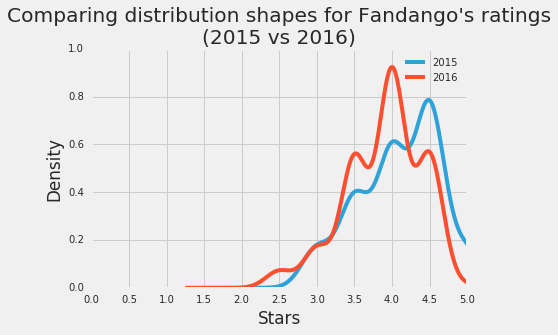

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use('fivethirtyeight')
old_data_col['Fandango_Stars'].plot.kde(label = '2015', legend = True)
new_data_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.legend()
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Stars')
plt.xlim(0,5)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)")
plt.show()

Both of the shapes are left skewed which means that most movies on Fandango have high ratings. Considering that Fandango sells tickets, this is a bit suspicious but should be looked at in more detail in another project as it is irrelevant to our goals.

The ratings generally low in 2016 compared to 2015 from 4.5 in 2015 to 4.0 being the highest density in 2016.

# Comparing Relative Frequencies

Now let's analyze more granular information by looking at the frequency distribuiton tables of both distributions.

The distribution tables show that the samples have a different number of movies (145 movies for 2015 and 213 for 2016). It dosn't make sense to compare two tables using absolute frequencies as that can skew the results so using percentages would make more sense.

In [22]:
print(old_data_col['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100)
print(new_data_2016['fandango'].value_counts(normalize = True).sort_index() * 100)

3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


We can see for the 2015 table (the top one) that the data ranges from 3 stars at the lowest while the 2016 table (the bottom one) has 2.5 stars as the lowest rating. Furthermore, most of the ratings in 2015 are 4.0 or 4.5 whereas the data is distibuited between 3.5-4.5 in 2016. There are also far fewer 5 star ratings in 2016 than in 2015.

This further shows that the ratings in 2016 are generally lower than in 2015.

# Determing the Direction of Change

While there is a clear difference, the direction is not as clear as it was on the kernal density plots. We'll take the mean, median and mode to determine what they tell us about the direction of the difference.

In [42]:
mean_2015 = old_data_col['Fandango_Stars'].mean()
mean_2016 = new_data_2016['fandango'].mean()

median_2015 = old_data_col['Fandango_Stars'].median()
median_2016 = new_data_2016['fandango'].median()

mode_2015 = old_data_col['Fandango_Stars'].mode()[0]
mode_2016 = new_data_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.089041,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Now that we have a dataframe with out summary statistics, we can plot these on a grouped bar plot.

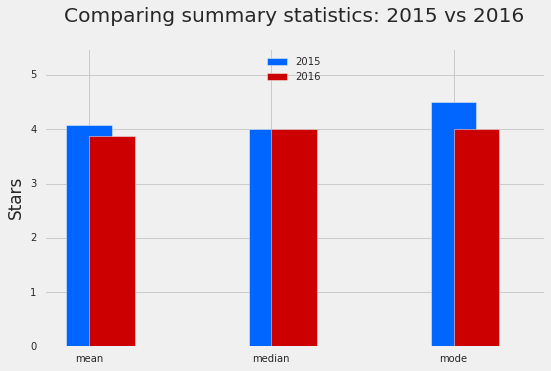

In [41]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The graph shows that the mean and mode ratings for 2015 and 2016 were higher but the median values were the same. The mode rating dropped by 0.5 stars and the mean value dropped by ~0.2. That is almost a 5% change.

# Conclusion

Overall we see that between 2015 and 2016 the average ratings on Fandango dropped noticeably. We can't be sure why this changed however it is most likely due to Fandango changing their biased rating system.